# Vector Plotting

## Description of code 

<p style='text-align: justify;'>
    The code below creates a 3D plot of the earth globe, one/or multiple, orbits around the earth and the vectors of speed and the magnetic field along the orbit points. Input parameters are an Orbit_Data_CSV_Filename, the step of the vectors, the size of the velocity vectors and the size of the magnetic field's vectors. Along with the abovementioned vectors, the Particle Detector's vectors are plotted.<br>


## Inputs
<p style='text-align: justify;'>
    In the dropdown list named (Orbit files:) you choose the orbit file containing the necessary data. <br>
<p style='text-align: justify;'>
    In the slider named (Velocity vector size:) you determine the size of the vector.The higher the value the bigger the velocity vectors to be shown on plot.<br>
<p style='text-align: justify;'>    
    In the slider named (Magnetic Field vector size:) you determine the size of the vector. The higher the value the bigger the magnetic field's vectors to be shown on plot.<br>
<p style='text-align: justify;'>   
    In the slider named (Orbit Step Size (sec):) you determine the total number of vectors. The higher the value, the lower the number of vectors.<br>
<p style='text-align: justify;'>   
    In the slider named (PD Vector Size:) you determine the size of the Particle Detector's vectors. The higher the value the bigger the Particle Detector's vectors to be shown on plot.<br>
<p style='text-align: justify;'> 
    In the checkbox named (PD Cone:) you check if you want to show the insertion cones of the particle detector. If the checkbox is not checked, no cones will be shown. <br>
    
    
## Prerequisites
<p style='text-align: justify;'>
    It is important to have inside the Orbit Data File the mentioned headers for latitude, longitude, time, altitude,speed vector's elements and magnetic field elements: <br>

->Time (UTCG) for time<br>
->Lat (deg) for latitude<br>
->Lon (deg) for longitude<br>
->Alt (km) for altitude<br>
->Vx (km/sec) for the Vx element speed<br>
->Vy (km/sec) for the Vy element speed<br>
->Vz (km/sec) for the Vz element speed<br>
->VMagnitude (km/sec) for the total magnitude of the speed vector<br>
->Bx (nT) for the Bx element of the magnetic field<br>
->By (nT) for the By element of the magnetic field<br>
->Bz (nT) for the Bz element of the magnetic field<br>
->BMagnitude (nT) for the total magnitude of the magnetic field vector<br>
 


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


/home/maze/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:65: MatplotlibDeprecationWarning:


The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.



Start Plotting...
Calculating 3D velocity vectors...Done
Calculating 3D Magnetic Field vectors...Done


/home/maze/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:97: MatplotlibDeprecationWarning:


The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.



IndexError: list index out of range

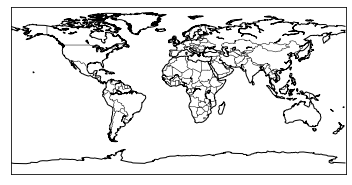

In [2]:
%load_ext autoreload
%autoreload 2
import sys
sys.path.insert(1, '../../SourceCode/')
import DaedalusGlobals as DaedalusGlobals
from os import path
from IPython.display import clear_output

from ipywidgets import*
import ipywidgets as widgets
import glob

from numpy import pi, sin, cos
import time
import plotly
import pandas as pd
# import plotly.plotly as py
import numpy as np
from mpl_toolkits.basemap import Basemap

#global parameters


Re = 6378.137 # km
LatStep  =  2.5 # global 
LonStep  =  2.5 # global 
theSurfaceOpacity = 0.90 
Redcolorscale=[[0.0, '#ff1115'], [1.0,'#ff1115']]

#GUI elements to be defined
style = {'description_width': '200px'}
layout1stcolumn = {'width': '600px'}
layout2ndcolumn= {'width': '250px'}
layout3rdcolumn= {'width': '100px'}
button_layout={'width': '150px'}

############################################ widgets declaration ###########################################################
OrbFilenames_Drpdwn = widgets.Dropdown( options=sorted(glob.glob(DaedalusGlobals.Orbit_Files_Path + "DAED_ORB_*POS_VEL_IGRF.csv")), description='Orbit files: ', style=style, layout=layout1stcolumn)
run_button=widgets.Button(value=False,description='Plot Orbit_Vectors',disabled=False,button_style='success',tooltip='Press to create the orbit plot with vectors', icon='check',layout=button_layout,style=style)
vector_step=widgets.IntSlider(value='140',min=10,max=500,step=20,description='Orbit Step Size (sec):',description_tooltip='Insert the step of the Vectors. The higher the value the lower the number of vectors to be shown on plot',disabled=False,layout=layout1stcolumn,style=style)
vlct_size=widgets.IntSlider(value='250',min=10,max=1000,step=10,description='Velocity vector size:',description_tooltip='Insert a value to resize visually the velocity Vectors. The higher the value the bigger the velocity vectors to be shown on plot',disabled=False,layout=layout1stcolumn,style=style)
Magnetic_size=widgets.FloatSlider(readout_format='.3f',value='0.05',min=0.001,max=1,step=0.001,description='Magnetic Field vector size:',description_tooltip='Insert a value to resize visually the Magnetic Field Vectors. The higher the value the bigger the velocity vectors to be shown on plot',disabled=False,layout=layout1stcolumn,style=style)
look_direct_size=widgets.IntSlider(value='500',min=10,max=1500,step=10,description='PD vector size:',description_tooltip="Insert a value to resize visually the particle detector's Vectors. The higher the value the bigger the vectors to be shown on plot",disabled=False,layout=layout1stcolumn,style=style)
Cone_PD_vectors=widgets.Checkbox(value=False,description='PD Cones:',disabled=False,description_tooltip="Check, if you want to show the insertion cones of the particle's detector",layout=layout1stcolumn,style=style)
#EF_vectors=widgets.Checkbox(value=False,description='Electric Field Vectors:',disabled=False,description_tooltip="Check, if you want to show the vectors of the electric field",layout=layout1stcolumn,style=style)
#############################################################################################################################################################################################################################################################################################################################################################################################

#convert degrees to radians
def degree2radians(degree):
    return degree*pi/180

# from plot.ly - maps the points of coords (lon, lat) to points onto the sphere of radius radius

def mapping_map_to_sphere(lon, lat, radius=Re):  
    lon=np.array(lon, dtype=np.float64)
    lat=np.array(lat, dtype=np.float64)
    lon=degree2radians(lon)
    lat=degree2radians(lat)
    xs=radius*cos(lon)*cos(lat)
    ys=radius*sin(lon)*cos(lat)
    zs=radius*sin(lat)
    return xs, ys, zs

# Make shortcut to Basemap object, not specifying projection type
m = Basemap()

# Functions converting coastline/country polygons to lon/lat traces
'''
    pos arg 1. (poly_paths): paths to polygons
    pos arg 2. (N_poly): number of polygon to convert
'''
def polygons_to_traces(poly_paths, N_poly):
    # init. plotting list
    lons=[]
    lats=[]
    for i_poly in range(N_poly):
        poly_path = poly_paths[i_poly]
        # get the Basemap coordinates of each segment
        coords_cc = np.array(
            [(vertex[0],vertex[1]) for (vertex,code) in poly_path.iter_segments(simplify=False)]
        )
        # convert coordinates to lon/lat by 'inverting' the Basemap projection
        lon_cc, lat_cc = m(coords_cc[:,0],coords_cc[:,1], inverse=True)
        lats.extend(lat_cc.tolist()+[None]) 
        lons.extend(lon_cc.tolist()+[None])
    return lons, lats

# Function generating coastline lon/lat
def get_coastline_traces():
    poly_paths = m.drawcoastlines().get_paths() # coastline polygon paths
    N_poly = 91  # use only the 91st biggest coastlines (i.e. no rivers)
    cc_lons, cc_lats= polygons_to_traces(poly_paths, N_poly)
    return cc_lons, cc_lats

# from plot.ly - Function generating country lon/lat 
def get_country_traces():
    poly_paths = m.drawcountries().get_paths() # country polygon paths
    N_poly = len(poly_paths)  # use all countries
    country_lons, country_lats= polygons_to_traces(poly_paths, N_poly)
    return country_lons, country_lats

###############

'''
Creates a 3D plot of the earth globe, one/or multiple, orbits around the earth and the vectors of speed and the magnetic 
field along the orbit points. Input parameters are an Orbit_Data_CSV_Filename and the plot's title. In future versions, 
plot's title will be filled automatically from the vectors chosen to be plot.
It is important to have inside the OrbitDataCSVfilename the mentioned headers for latitude, longitude, time, altitude,speed vector's elements
and magnetic field elements: 
    -Time (UTCG) for time
    -Lat (deg) for latitude
    -Lon (deg) for longitude
    -Alt (km) for altitude
    -Vx (km/sec) for the Vx element speed
    -Vy (km/sec) for the Vy element speed
    -Vz (km/sec) for the Vz element speed
    -VMagnitude (km/sec) for the total magnitude of the speed vector
    -Bx (nT) for the Bx element of the magnetic field
    -By (nT) for the By element of the magnetic field
    -Bz (nT) for the Bz element of the magnetic field
    -BMagnitude (nT) for the total magnitude of the magnetic field vector
 
  RETURNS: a string containing information about the Data
'''
def VECTORING(OrbitDataCSVfilename, vel_size,mag_size,step_size,pdv_size,con_bool):
    
    print('Start Plotting...')
    result = ""
    startSecs = time.time()
    #define colorscales for black and white
    colorscaleWhite=[[0.0, '#ffffff'], [1.0, '#ffffff']]
    colorscaleBlack=[[0.0, '#666666'], [1.0, '#666666']]
    
#### creating the earth's surface
#### construct the values for longitude and latitude
    
    lat = np.arange(87.5,-88.5,-LatStep)
    lon = np.arange(-180.0,180.0,LonStep)
    # To ensure color continuity we extend the lon list with [180] (its last value was lon[-1]=177.5). In this way we can identify lon=-180 with lon=180.
    # We do the same with latitudes. We extend both directions with [90] and [-90] in order to have values for the poles.
    clons = np.array( lon.tolist() + [180]        , dtype=np.float64)
    clats = np.array( [90] + lat.tolist() + [-90] , dtype=np.float64)
    clons, clats=np.meshgrid(clons, clats)
    earthX, earthY, earthZ = mapping_map_to_sphere(clons, clats, radius=Re)
    earthS = np.zeros(clons.shape, dtype=np.float64)
    EarthSurface=dict(type='surface',
        x = earthX, y = earthY, z = earthZ,
        colorscale = colorscaleWhite, surfacecolor = earthS,
        showscale = False, cmin=-20, cmax=20,
    )


    # Get list of of coastline, country, and state lon/lat and concatenate them
    coastline_lons, coastline_lats = get_coastline_traces()
    country_lons, country_lats = get_country_traces()
    boundaries_lons = coastline_lons+[None]+country_lons
    boundaries_lats = coastline_lats+[None]+country_lats
    boundaries_dataX, boundaries_dataY, boundaries_dataZ = mapping_map_to_sphere(boundaries_lons, boundaries_lats, radius = Re+0.1) # radius is slightly greater than 1 to ensure lines visibility
    # create the visual element of the world map
    Boundaries=dict(type='scatter3d',
        x=boundaries_dataX, y=boundaries_dataY, z=boundaries_dataZ,
        mode='lines', name= "", showlegend=False, line=dict(color='black', width=1)
    )

# define the general layout of the plot
    theLayout = dict(scene_aspectmode='manual',autosize=False,width=1000, height=1000,\
        title = "Orbit with Magnetic field's and Particle Detector's Look Direction vectors",legend_orientation="h", \
        scene = dict(
            xaxis = dict( zeroline=True,range=[-11000,11000] ), yaxis = dict( zeroline=True,range=[-11000,11000] ), zaxis = dict( zeroline=False, range=[-11000,11000] ),
            aspectratio=dict(x=1, y=1,z=1), camera=dict(eye=dict(x=1.20, y=1.20, z=1.20))
        )
    )
        
# for the orbit, reading from file the appropriate columns
    if len(OrbitDataCSVfilename) > 0:
        Orb_Data_File = pd.read_csv(OrbitDataCSVfilename)
        lat_geod = np.array(Orb_Data_File['Lat (deg)'],dtype=float)
        lon_geod = np.array(Orb_Data_File['Lon (deg)'],dtype=float)
        alt_geod = np.array(Orb_Data_File['Alt (km)'],dtype=float)
           
        Orb_min_h = min(alt_geod)
        Orb_max_h = max(alt_geod)
        GeneralMin = Orb_min_h
        GeneralMax = Orb_max_h
    else:
        print("No file was provided")

    # add all visual elements in a list and assign them to a figure
    Plotables = list()
    Plotables.append(EarthSurface)
    Plotables.append(Boundaries)
    
    if len(OrbitDataCSVfilename) > 0:
        Plotables.append(CreatePlotable_OrbitPath(lon_geod,lat_geod,alt_geod))
        start_tip_speed,end_tip_speed,strt_x,strt_y,strt_z,end_x,end_y,end_z = Create3D_VELOCITY_ARROWS(OrbitDataCSVfilename,vel_size,step_size)
        Plotables.append(start_tip_speed)
        Plotables.append(end_tip_speed)
        for i in range (0,len(strt_z)):
            Plotables.append(dict( type = "scatter3d", mode = "lines",x = [strt_x[i],end_x[i]],y = [strt_y[i],end_y[i]],z = [strt_z[i],end_z[i]], showlegend = False, line=dict(width=3,color='black')))
        start_tip_B,end_tip_B,strt_xB,strt_yB,strt_zB,end_xB,end_yB,end_zB = Create3D_MagField_ARROWS(OrbitDataCSVfilename,mag_size,step_size)
        Plotables.append(start_tip_B)
        Plotables.append(end_tip_B)
        for i in range (0,len(strt_zB)):
            Plotables.append(dict( type = "scatter3d", mode = "lines",x = [strt_xB[i],end_xB[i]],y = [strt_yB[i],end_yB[i]],z = [strt_zB[i],end_zB[i]], showlegend = False, line=dict(width=6,color='darkgreen')))        
    
        #look_directions vectors
        Cone1,Cone2,Cone3,Cone4,Cone5,start_tip_look,Arrow_end_Pointse1,Arrow_end_Pointse2,Arrow_end_Pointse3,Arrow_end_Pointse4,Arrow_end_Pointse5,strt_arr_pointx,strt_arr_pointy,strt_arr_pointz,end_arr_pnte1x,end_arr_pnte1y,end_arr_pnte1z,end_arr_pnte2x,end_arr_pnte2y,end_arr_pnte2z,end_arr_pnte3x,end_arr_pnte3y,end_arr_pnte3z,end_arr_pnte4x,end_arr_pnte4y,end_arr_pnte4z,end_arr_pnte5x,end_arr_pnte5y,end_arr_pnte5z = Look_Directions(OrbitDataCSVfilename,pdv_size,con_bool,step_size)
        
        Plotables.append(start_tip_look)
        Plotables.append(Arrow_end_Pointse1)
        Plotables.append(Arrow_end_Pointse2)
        Plotables.append(Arrow_end_Pointse3)
        Plotables.append(Arrow_end_Pointse4)
        Plotables.append(Arrow_end_Pointse5)
        Plotables.append(Cone1)
        Plotables.append(Cone2)
        Plotables.append(Cone3)
        Plotables.append(Cone4)
        Plotables.append(Cone5)
        
        #plotting the lines for the look direction particles
        for i in range (0,len(strt_zB)):
            Plotables.append(dict(type = "scatter3d", mode = "lines",x = [strt_arr_pointx[i],end_arr_pnte1x[i]],y = [strt_arr_pointy[i],end_arr_pnte1y[i]],z = [strt_arr_pointz[i],end_arr_pnte1z[i]], showlegend = False, line=dict(width=3,color='purple')))
            Plotables.append(dict(type = "scatter3d", mode = "lines",x = [strt_arr_pointx[i],end_arr_pnte2x[i]],y = [strt_arr_pointy[i],end_arr_pnte2y[i]],z = [strt_arr_pointz[i],end_arr_pnte2z[i]], showlegend = False, line=dict(width=3,color='purple')))
            Plotables.append(dict(type = "scatter3d", mode = "lines",x = [strt_arr_pointx[i],end_arr_pnte3x[i]],y = [strt_arr_pointy[i],end_arr_pnte3y[i]],z = [strt_arr_pointz[i],end_arr_pnte3z[i]], showlegend = False, line=dict(width=3,color='purple')))        
            Plotables.append(dict(type = "scatter3d", mode = "lines",x = [strt_arr_pointx[i],end_arr_pnte4x[i]],y = [strt_arr_pointy[i],end_arr_pnte4y[i]],z = [strt_arr_pointz[i],end_arr_pnte4z[i]], showlegend = False, line=dict(width=3,color='purple')))
            Plotables.append(dict(type = "scatter3d", mode = "lines",x = [strt_arr_pointx[i],end_arr_pnte5x[i]],y = [strt_arr_pointy[i],end_arr_pnte5y[i]],z = [strt_arr_pointz[i],end_arr_pnte5z[i]], showlegend = False, line=dict(width=3,color='purple')))    
    
    
    
    fig = dict(data=Plotables, layout=theLayout)

    plotly.offline.iplot(fig)
    #plotly.offline.init_notebook_mode(connected=True)
    finishSecs = time.time()
    #result = result + "Lon shape: " + str(lon.shape) + "  Lat shape: " + str(lat.shape) + "  Data shape: " + str(Data.shape) + "\n"
    if len(OrbitDataCSVfilename) > 0: result = result + "Orbit Min: " + str(Orb_min_h) + "  Orbit Max: " + str(Orb_max_h) + "\n"
    result = result + "General Min: " + str(GeneralMin) + "  General Max: " + str(GeneralMax) + "\n"
    result = result + "Plot creation duration: " + str(finishSecs-startSecs) + " seconds.\n"
    return result;


##################################################################################################

##################################################################################################

def CreatePlotable_OrbitPath(lon,lat,alt):

    # process orbit-data in order to plot them in relation with the globe: Convert lat,lon,alt to x,y,z
    for i in range(0, len(alt)): alt[i] = alt[i] + Re # form radius from earth center using altitude
    tmplon = degree2radians(lon)
    tmplat = degree2radians(lat)
    OrbitX = alt * cos(tmplon) * cos(tmplat)
    OrbitY = alt * sin(tmplon) * cos(tmplat)
    OrbitZ = alt * sin(tmplat)
    # create the orbit path points for the plot
    OrbitPath = dict( type = "scatter3d", mode = "lines", x = OrbitX,  y = OrbitY,  z = OrbitZ, showlegend = False,
    line=dict(width=4,color='blue'))

    return OrbitPath

def Create3D_VELOCITY_ARROWS(OrbitDataCSVfilename,vl_size,stp_size):
    """
    Calculate the arrays with the positions of the end of the arrows
    """
    
    Orb_Data_File = pd.read_csv(OrbitDataCSVfilename)
    lat = np.array(Orb_Data_File['Lat (deg)'],dtype=float)
    lon = np.array(Orb_Data_File['Lon (deg)'],dtype=float)
    alt = np.array(Orb_Data_File['Alt (km)'],dtype=float)
        
    #reading the appropriate elements for the speed vector elements
    vx = vl_size * np.array(Orb_Data_File['Vx (km/sec)'],dtype=float)
    vy = vl_size * np.array(Orb_Data_File['Vy (km/sec)'],dtype=float)
    vz = vl_size * np.array(Orb_Data_File['Vz (km/sec)'],dtype=float)
    vtot = np.array(Orb_Data_File['VMagnitude (km/sec)'],dtype=float)
    # process orbit-data in order to plot them in relation with the globe: Convert lat,lon,alt to x,y,z
    for i in range(0, len(alt)): alt[i] = alt[i] + Re # form radius from earth center using altitude
    tmplon = degree2radians(lon)
    tmplat = degree2radians(lat)
    OrbitX = alt * cos(tmplon) * cos(tmplat)
    OrbitY = alt * sin(tmplon) * cos(tmplat)
    OrbitZ = alt * sin(tmplat)
    # create the start and ending points for the arrow
    end_arr_pointx = []
    end_arr_pointy = []
    end_arr_pointz = []
    start_arr_pointx = []
    start_arr_pointy = []
    start_arr_pointz = []
    vtot_arr = []
    speed_text = []
    #Create a more minimalised version of the vectors
    for i in range(0,len(vx),stp_size):
        start_arr_pointx.append(OrbitX[i])
        start_arr_pointy.append(OrbitY[i])
        start_arr_pointz.append(OrbitZ[i])
        end_arr_pointx.append(vx[i]+OrbitX[i])
        end_arr_pointy.append(vy[i]+OrbitY[i])
        end_arr_pointz.append(vz[i]+OrbitZ[i])
        vtot_arr.append(vtot[i])
    for i in range(0,len(vx),stp_size):   
        speed_text.append("Velocity:"+str(vtot[i])+"km/s")

    Arrow_start_Points = dict( type = "scatter3d",x = start_arr_pointx,  y = start_arr_pointy,\
                              z = start_arr_pointz,showlegend = False, mode = "markers", \
                                  marker=dict(size=2,symbol='circle',color='blue'))
    
        
    Arrow_end_Points = dict( type = "scatter3d",x = end_arr_pointx,  y = end_arr_pointy, \
                            z = end_arr_pointz,showlegend = False,hovertext=speed_text,\
                                mode = "markers",marker=dict(colorbar=dict(x=1,xanchor='right',title=dict(text="Velocity (km/s)")),size=2,symbol='diamond', \
                                                             color=vtot_arr,colorscale='viridis',\
                                                                 showscale=False,cmin=min(vtot),cmax=max(vtot)))

    
    print('Calculating 3D velocity vectors...Done')
    return Arrow_start_Points,Arrow_end_Points,start_arr_pointx,start_arr_pointy,start_arr_pointz,end_arr_pointx,end_arr_pointy,end_arr_pointz

def Create3D_MagField_ARROWS(OrbitDataCSVfilename,mg_size,stp_size):
    """
    Calculate the arrays with the positions of the end of the arrows
    """
    Orb_Data_File = pd.read_csv(OrbitDataCSVfilename)
    lat = np.array(Orb_Data_File['Lat (deg)'],dtype=float)
    lon = np.array(Orb_Data_File['Lon (deg)'],dtype=float)
    alt = np.array(Orb_Data_File['Alt (km)'],dtype=float)
        
    #reading the appropriate elements for the magnetic field lines
    bx = mg_size*np.array(Orb_Data_File['Bx (nT)'],dtype=float)
    by = mg_size*np.array(Orb_Data_File['By (nT)'],dtype=float)
    bz = mg_size*np.array(Orb_Data_File['Bz (nT)'],dtype=float)
    btot = np.array(Orb_Data_File['BMagnitude (nT)'],dtype=float)
    # process orbit-data in order to plot them in relation with the globe: Convert lat,lon,alt to x,y,z
    for i in range(0, len(alt)): alt[i] = alt[i] + Re # form radius from earth center using altitude
    tmplon = degree2radians(lon)
    tmplat = degree2radians(lat)
    OrbitX = alt * cos(tmplon) * cos(tmplat)
    OrbitY = alt * sin(tmplon) * cos(tmplat)
    OrbitZ = alt * sin(tmplat)
    # create the start and ending points for the arrow
    end_arr_pointx = []
    end_arr_pointy = []
    end_arr_pointz = []
    start_arr_pointx = []
    start_arr_pointy = []
    start_arr_pointz = []
    btot_arr = []
    speed_text = []
    #Create fewer of the vectors, decide the step.
    for i in range(0,len(bx),stp_size):
        start_arr_pointx.append(OrbitX[i])
        start_arr_pointy.append(OrbitY[i])
        start_arr_pointz.append(OrbitZ[i])
        end_arr_pointx.append(bx[i]+OrbitX[i])
        end_arr_pointy.append(by[i]+OrbitY[i])
        end_arr_pointz.append(bz[i]+OrbitZ[i])
        btot_arr.append(btot[i])
    for i in range(0,len(bx),stp_size):   
        speed_text.append("Magnetic Field:"+str(btot[i])+"nT")

    Arrow_start_Points = dict( type = "scatter3d",x = start_arr_pointx,  y = start_arr_pointy,\
                              z = start_arr_pointz,showlegend = False, mode = "markers", \
                                  marker=dict(size=2,symbol='circle',color='blue'))
    
        
    Arrow_end_Points = dict( type = "scatter3d",x = end_arr_pointx,  y = end_arr_pointy, \
                            z = end_arr_pointz,showlegend = False,hovertext=speed_text,\
                                mode = "markers",marker=dict(colorbar=dict(x=0,xanchor='left',title=dict(text="Magnetic Field (nT)")),size=2,symbol='diamond', \
                                                             color=btot_arr,colorscale='peach',\
                                                                 showscale=False,cmin=min(btot),cmax=max(btot)))

    
    print('Calculating 3D Magnetic Field vectors...Done')
    return Arrow_start_Points,Arrow_end_Points,start_arr_pointx,start_arr_pointy,start_arr_pointz,end_arr_pointx,end_arr_pointy,end_arr_pointz

def Look_Directions(OrbitDataCSVfilename,pdvsize,cn_bool,stp_size):
        
    Orb_Data_File = pd.read_csv(OrbitDataCSVfilename)
    lat = np.array(Orb_Data_File['Lat (deg)'],dtype=float)
    lon = np.array(Orb_Data_File['Lon (deg)'],dtype=float)
    alt = np.array(Orb_Data_File['Alt (km)'],dtype=float)
        
    #reading the appropriate elements for the speed vector elements
    vx = 250 * np.array(Orb_Data_File['Vx (km/sec)'],dtype=float)
    vy = 250 * np.array(Orb_Data_File['Vy (km/sec)'],dtype=float)
    vz = 250 * np.array(Orb_Data_File['Vz (km/sec)'],dtype=float)
    vtot = np.array(Orb_Data_File['VMagnitude (km/sec)'],dtype=float)

    # process orbit-data in order to plot them in relation with the globe: Convert lat,lon,alt to x,y,z
    for i in range(0, len(alt),int(stp_size*2)): alt[i] = alt[i] + Re # form radius from earth center using altitude
    tmplon = degree2radians(lon)
    tmplat = degree2radians(lat)
    OrbitX = alt * cos(tmplon) * cos(tmplat)
    OrbitY = alt * sin(tmplon) * cos(tmplat)
    OrbitZ = alt * sin(tmplat)
    Orbit_mag = np.sqrt(OrbitX**2+OrbitY**2+OrbitZ**2)

    
    # create the start and ending points for the arrow
    end_arr_pointe1x = []
    end_arr_pointe1y = []
    end_arr_pointe1z = []
    
    end_cone_pointe1x = []
    end_cone_pointe1y = []
    end_cone_pointe1z = []    
    
    end_arr_pointe2x = []
    end_arr_pointe2y = []
    end_arr_pointe2z = []
    
    end_cone_pointe2x = []
    end_cone_pointe2y = []
    end_cone_pointe2z = []    
    
    end_arr_pointe3x = []
    end_arr_pointe3y = []
    end_arr_pointe3z = []
    
    end_cone_pointe3x = []
    end_cone_pointe3y = []
    end_cone_pointe3z = []      
    
    end_arr_pointe4x = []
    end_arr_pointe4y = []
    end_arr_pointe4z = []
    
    end_cone_pointe4x = []
    end_cone_pointe4y = []
    end_cone_pointe4z = []      
    
    end_arr_pointe5x = []
    end_arr_pointe5y = []
    end_arr_pointe5z = []

    end_cone_pointe5x = []
    end_cone_pointe5y = []
    end_cone_pointe5z = []    
    
    start_arr_point6x = []
    start_arr_point6y = []
    start_arr_point6z = []
    
    scale_factor = pdvsize
    
    #here initiating the matrixes for cross products
    e1 = np.zeros((len(vx),3))
    e2 = np.zeros((len(vx),3))
    e3 = np.zeros((len(vx),3))
    e4 = np.zeros((len(vx),3))
    e5 = np.zeros((len(vx),3))  
    
    vunit = np.zeros((len(vx),3))
    Runit = np.zeros((len(vx),3))
    #Create a more minimalised version of the vectors
    for i in range(0,len(vx),int(stp_size*2)):
        #here normalizing the elements of the vector 
        vunit[i,:] = [vx[i],vy[i],vz[i]]/vtot[i]
        Runit[i,:] = -([OrbitX[i],OrbitY[i],OrbitZ[i]]/Orbit_mag[i])
        e1[i,:]=(np.cross(vunit[i],Runit[i]))
        Norm = np.sqrt(e1[i,0]**2+e1[i,1]**2+e1[i,2]**2)
        e1[i,:]=e1[i,:]/Norm
        e2[i,:]=(np.cross(e1[i],vunit[i]))
        Norm = np.sqrt(e2[i,0]**2+e2[i,1]**2+e2[i,2]**2)
        e2[i,:]=e2[i,:]/Norm        
        e3[i,:]=(-(np.cross(e1[i],vunit[i])))
        Norm = np.sqrt(e3[i,0]**2+e3[i,1]**2+e3[i,2]**2)
        e3[i,:]=e3[i,:]/Norm
        e4[i,:]=e1[i,:]+e2[i,:]
        Norm = np.sqrt(e4[i,0]**2+e4[i,1]**2+e4[i,2]**2)
        e4[i,:]=e4[i,:]/Norm  
        e5[i,:]=e1[i,:]+e3[i,:]
        Norm = np.sqrt(e5[i,0]**2+e5[i,1]**2+e5[i,2]**2)
        e5[i,:]=e5[i,:]/Norm     
        
    #Create fewer of the vectors, decide the step.
    
    for i in range(0,len(vx),int(stp_size*2)):
        
        start_arr_point6x.append(OrbitX[i])
        start_arr_point6y.append(OrbitY[i])
        start_arr_point6z.append(OrbitZ[i])
        
        end_arr_pointe1x.append(e1[i,0]*scale_factor+OrbitX[i])
        end_arr_pointe1y.append(e1[i,1]*scale_factor+OrbitY[i])
        end_arr_pointe1z.append(e1[i,2]*scale_factor+OrbitZ[i])
        
        end_cone_pointe1x.append((-e1[i,0])/scale_factor)
        end_cone_pointe1y.append((-e1[i,1])/scale_factor)
        end_cone_pointe1z.append((-e1[i,2])/scale_factor)
        
        end_arr_pointe2x.append(e2[i,0]*scale_factor+OrbitX[i])
        end_arr_pointe2y.append(e2[i,1]*scale_factor+OrbitY[i])
        end_arr_pointe2z.append(e2[i,2]*scale_factor+OrbitZ[i])
        
        end_cone_pointe2x.append(-e2[i,0]/scale_factor)
        end_cone_pointe2y.append(-e2[i,1]/scale_factor)
        end_cone_pointe2z.append(-e2[i,2]/scale_factor)        
        
        end_arr_pointe3x.append(e3[i,0]*scale_factor+OrbitX[i])
        end_arr_pointe3y.append(e3[i,1]*scale_factor+OrbitY[i])
        end_arr_pointe3z.append(e3[i,2]*scale_factor+OrbitZ[i])
        
        end_cone_pointe3x.append(-e3[i,0]/scale_factor)
        end_cone_pointe3y.append(-e3[i,1]/scale_factor)
        end_cone_pointe3z.append(-e3[i,2]/scale_factor)        

        end_arr_pointe4x.append(e4[i,0]*scale_factor+OrbitX[i])
        end_arr_pointe4y.append(e4[i,1]*scale_factor+OrbitY[i])
        end_arr_pointe4z.append(e4[i,2]*scale_factor+OrbitZ[i])
        
        end_cone_pointe4x.append(-e4[i,0]/scale_factor)
        end_cone_pointe4y.append(-e4[i,1]/scale_factor)
        end_cone_pointe4z.append(-e4[i,2]/scale_factor)        

        end_arr_pointe5x.append(e5[i,0]*scale_factor+OrbitX[i])
        end_arr_pointe5y.append(e5[i,1]*scale_factor+OrbitY[i])
        end_arr_pointe5z.append(e5[i,2]*scale_factor+OrbitZ[i])
        
        end_cone_pointe5x.append(-e5[i,0]/scale_factor)
        end_cone_pointe5y.append(-e5[i,1]/scale_factor)
        end_cone_pointe5z.append(-e5[i,2]/scale_factor)
        
           
    Arrow_start_Points = dict( type = "scatter3d",x = start_arr_point6x,  y = start_arr_point6y,\
                              z = start_arr_point6z,showlegend = False, mode = "markers", \
                                  marker=dict(size=2,symbol='circle',color='blue'))

    Arrow_end_Pointse1 = dict( type = "scatter3d",x = end_arr_pointe1x,  y = end_arr_pointe1y, \
                            z = end_arr_pointe1z,name='Particle Detector 1',showlegend = False,\
                                mode = "markers",marker=dict(size=2,symbol='diamond', \
                                                                 color='red'))
    
    Arrow_end_Pointse2 = dict( type = "scatter3d",x = end_arr_pointe2x,  y = end_arr_pointe2y, \
                            z = end_arr_pointe2z,name='Particle Detector 2',showlegend = False,\
                                mode = "markers",marker=dict(size=2,symbol='diamond', \
                                                                 color='red'))

    Arrow_end_Pointse3 = dict( type = "scatter3d",x = end_arr_pointe3x,  y = end_arr_pointe3y, \
                            z = end_arr_pointe3z,name='Particle Detector 3',showlegend = False,\
                                mode = "markers",marker=dict(size=2,symbol='diamond', \
                                                                 color='red'))
        
    Arrow_end_Pointse4 = dict( type = "scatter3d",x = end_arr_pointe4x,  y = end_arr_pointe4y, \
                            z = end_arr_pointe4z,name='Particle Detector 4',showlegend = False,\
                                mode = "markers",marker=dict(size=2,symbol='diamond', \
                                                                 color='red'))
        
    Arrow_end_Pointse5 = dict( type = "scatter3d",x = end_arr_pointe5x,  y = end_arr_pointe5y, \
                            z = end_arr_pointe5z,name='Particle Detector 5',showlegend = False,\
                                mode = "markers",marker=dict(size=2,symbol='diamond', \
                                                                 color='red'))
    
    Cone_1 = dict( type = "cone",x = start_arr_point6x,  y = start_arr_point6y,\
                              z = start_arr_point6z,u=end_cone_pointe1x,v=end_cone_pointe1y,w=end_cone_pointe1z, showscale=False,colorscale=Redcolorscale,cauto=True,opacity=0.2,anchor='tip',visible=cn_bool)
    
    Cone_2 = dict( type = "cone",x = start_arr_point6x,  y = start_arr_point6y,\
                              z = start_arr_point6z,u=end_cone_pointe2x,v=end_cone_pointe2y,w=end_cone_pointe2z, showscale=False,colorscale=Redcolorscale,cauto=True,opacity=0.2,anchor='tip',visible=cn_bool)

    Cone_3 = dict( type = "cone",x = start_arr_point6x,  y = start_arr_point6y,\
                              z = start_arr_point6z,u=end_cone_pointe3x,v=end_cone_pointe3y,w=end_cone_pointe3z, showscale=False,colorscale=Redcolorscale,cauto=True,opacity=0.2,anchor='tip',visible=cn_bool)
        
    Cone_4 = dict( type = "cone",x = start_arr_point6x,  y = start_arr_point6y,\
                              z = start_arr_point6z,u=end_cone_pointe4x,v=end_cone_pointe4y,w=end_cone_pointe4z, showscale=False,colorscale=Redcolorscale,cauto=True,opacity=0.2,anchor='tip',visible=cn_bool)
        
    Cone_5 = dict( type = "cone",x = start_arr_point6x,  y = start_arr_point6y,\
                              z = start_arr_point6z,u=end_cone_pointe5x,v=end_cone_pointe5y,w=end_cone_pointe5z, showscale=False,colorscale=Redcolorscale,cauto=True,opacity=0.2,anchor='tip',visible=cn_bool)    

    
    return Cone_1,Cone_2,Cone_3,Cone_4,Cone_5,Arrow_start_Points,Arrow_end_Pointse1,Arrow_end_Pointse2,Arrow_end_Pointse3,Arrow_end_Pointse4,Arrow_end_Pointse5,start_arr_point6x,start_arr_point6y,start_arr_point6z,end_arr_pointe1x,end_arr_pointe1y,end_arr_pointe1z,end_arr_pointe2x,end_arr_pointe2y,end_arr_pointe2z,end_arr_pointe3x,end_arr_pointe3y,end_arr_pointe3z,end_arr_pointe5x,end_arr_pointe5y,end_arr_pointe5z,end_arr_pointe4x,end_arr_pointe4y,end_arr_pointe4z


#############################################################################################################################################################################################################################################################################################################################################################################################
def run_plot(x): 
    #elements to be transfered in the plot functions
    filename_value=OrbFilenames_Drpdwn.value
    vlct_size_value = vlct_size.value
    vector_step_value = vector_step.value
    Magnetic_size_value = Magnetic_size.value
    pdv_size_value = look_direct_size.value
    cone_show_boolean = Cone_PD_vectors.value
    #ef_vctr_boolean = EF_vectors.value
    
    VECTORING(filename_value,int(vlct_size_value),float(Magnetic_size_value),int(vector_step_value),pdv_size_value,cone_show_boolean)


y1=widgets.VBox([OrbFilenames_Drpdwn,vlct_size,Magnetic_size,vector_step,look_direct_size,Cone_PD_vectors])
y3=widgets.VBox([run_button])


run_button.on_click(run_plot)
box=widgets.HBox([y1,y3])
display(box)